In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data =pd.read_csv(r"C:\Users\LENOVO\Downloads\advertising.csv")

In [29]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [31]:
data.shape

(200, 4)

In [33]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [35]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

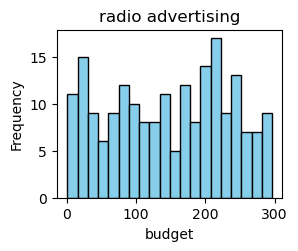

In [38]:
plt.subplot(2,2,1)
plt.hist(data['TV'], bins=20,color='skyblue',edgecolor='black')
plt.title('radio advertising')
plt.xlabel('budget')
plt.ylabel('Frequency')

Text(0, 0.5, 'frequency')

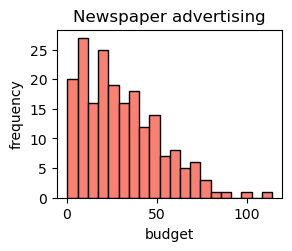

In [40]:
plt.subplot(2,2,3)
plt.hist(data['Newspaper'],bins=20,color='salmon',edgecolor='black')
plt.title('Newspaper advertising')
plt.xlabel('budget')
plt.ylabel('frequency')

Text(0, 0.5, 'Frequency')

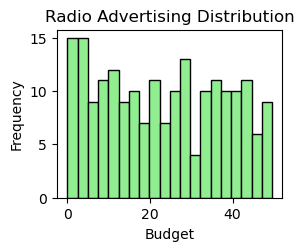

In [41]:
plt.subplot(2, 2, 2)
plt.hist(data['Radio'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Radio Advertising Distribution')
plt.xlabel('Budget')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

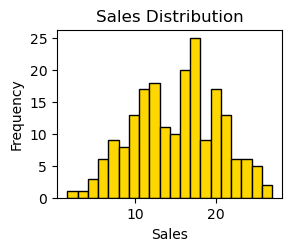

In [42]:
plt.subplot(2, 2, 4)
plt.hist(data['Sales'], bins=20, color='gold', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

In [44]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

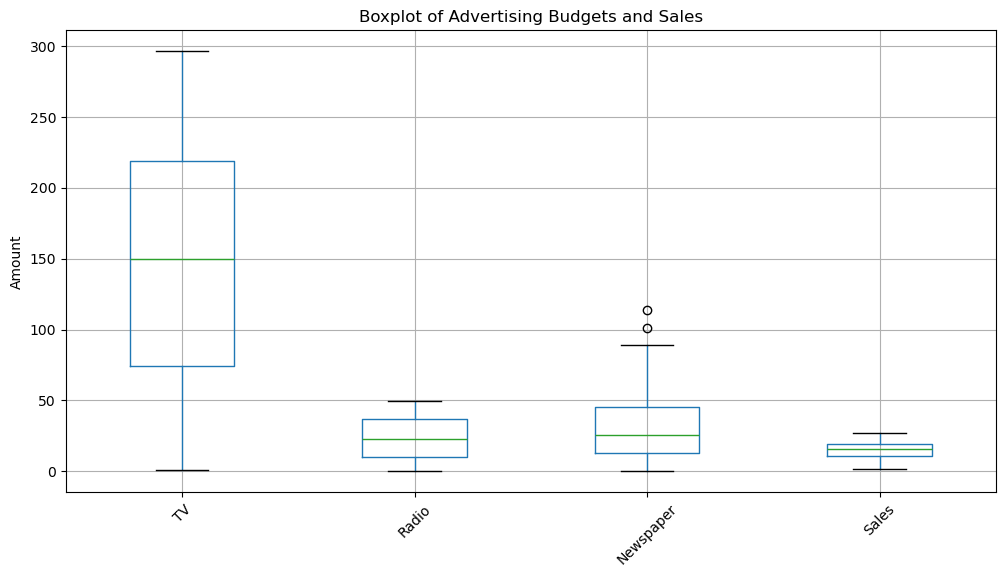

In [45]:
plt.figure(figsize=(12, 6))
data.boxplot(column=['TV', 'Radio', 'Newspaper', 'Sales'])
plt.title('Boxplot of Advertising Budgets and Sales')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


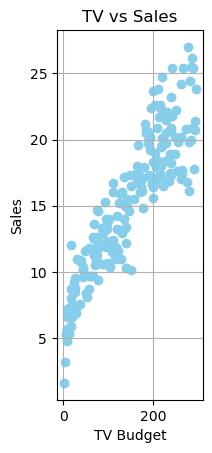

In [47]:
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'], color='skyblue')
plt.title('TV vs Sales')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

In [48]:
x=data['TV'].values
y=data['Sales'].values

In [50]:
x=(x-np.mean(x))/np.std(x)

In [53]:
x=np.column_stack((np.ones(len(x)),x))

In [54]:
theta=np.zeros(x.shape[1])

In [56]:
learning_rate=0.001
iterations=1000
m=len(y)

In [57]:
def gradient_descent(x,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        predictions=x.dot(theta)
        errors=predictions-y
        gradient=(1/m)*x.T.dot(errors)
        theta=theta-learning_rate*gradient
        cost=(1/(2*m))*np.sum(errors**2)
        cost_history[i]=cost
    return theta,cost_history
theta,cost_history=gradient_descent(x,y,theta,learning_rate,iterations)

Intercept (theta0): 9.5671
Slope (theta1): 3.0034


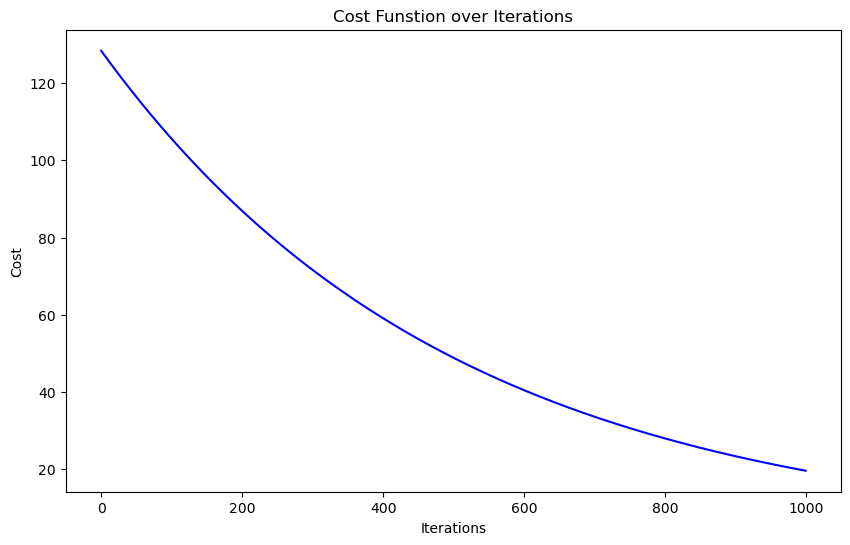

In [60]:
print(f"Intercept (theta0): {theta[0]:.4f}")
print(f"Slope (theta1): {theta[1]:.4f}")
plt.figure(figsize=(10,6))
plt.plot(range(len(cost_history)),cost_history,'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Funstion over Iterations')
plt.show()

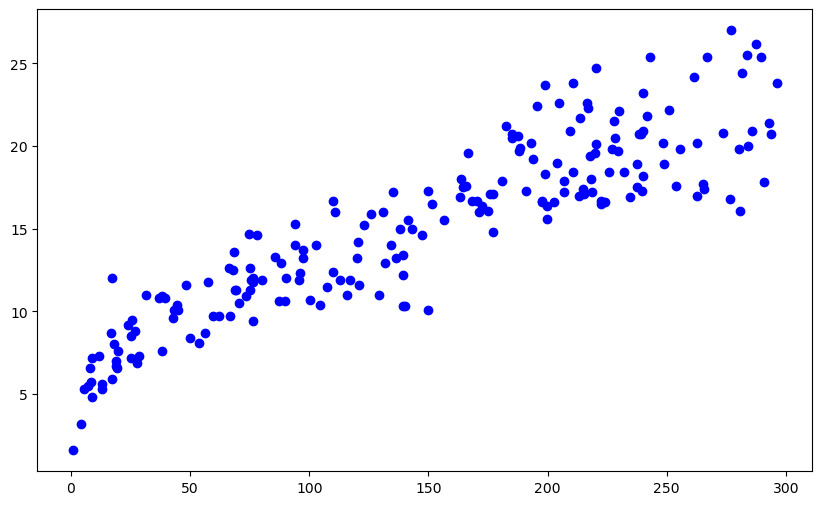

In [65]:
x_unscaled=data['TV'].values
plt.figure(figsize=(10,6))
plt.scatter(x_unscaled,y,color='blue' ,label='Actual Data')

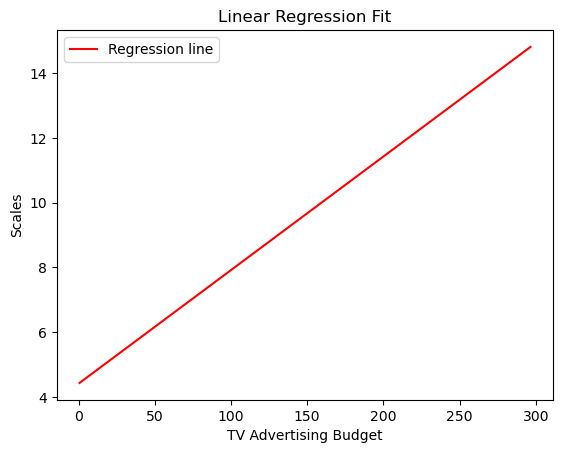

In [67]:
x_vals=np.linspace(min(x_unscaled),max(x_unscaled),100)
x_vals_scaled=(x_vals-np.mean(data['TV'])) /np.std(data['TV'])
y_vals=theta[0]+theta[1]*x_vals_scaled
plt.plot(x_vals,y_vals,color='red',label='Regression line')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Scales')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [77]:
def evaluate_model(x, y, theta):
    y_pred = x.dot(theta)
    mse = np.mean((y - y_pred)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    ss_res = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_res / ss_total)
    
    return mse, r_squared

mse, r2 = evaluate_model(x, y, theta)
print(f"MSE: {mse:.4f}, R²: {r2:.4f}")

MSE: 39.2197, R²: -0.4118


In [91]:
def predict_price(area, theta, original_means, original_stds):

    area_norm = (area - original_means['area']) / original_stds['area']

    price_norm = theta[0] + theta[1] * area_norm

    price = price_norm * original_stds['price'] + original_means['price']
    
    return price